In [1]:
import db

In [2]:
#db.create_db()

In [7]:
import coin_repository

In [8]:
from matplotlib import pyplot as plt
import pandas as pd

dead cross: (4405.668000000002, 4412.205000000003, 4226.06, datetime.date(2017, 9, 9))
golden cross: (3898.8660000000027, 3870.25, 4200.67, datetime.date(2017, 9, 27))
dead cross: (6525.776, 6601.9519999999975, 6559.49, datetime.date(2017, 11, 13))
golden cross: (6866.508000000002, 6821.2744999999995, 7871.69, datetime.date(2017, 11, 16))
dead cross: (15747.040000000003, 16224.350000000011, 14699.2, datetime.date(2017, 12, 23))
golden cross: (16147.760000000004, 15425.370000000004, 17527.0, datetime.date(2018, 1, 6))
dead cross: (14924.440000000006, 14998.970000000001, 13405.8, datetime.date(2018, 1, 11))
golden cross: (9483.962000000001, 9118.406500000008, 10233.9, datetime.date(2018, 2, 16))
dead cross: (10645.276000000007, 10650.574000000011, 9395.01, datetime.date(2018, 3, 8))
golden cross: (7514.906000000005, 7249.615500000007, 7986.24, datetime.date(2018, 4, 14))
dead cross: (9083.688000000006, 9264.209500000008, 8441.49, datetime.date(2018, 5, 11))
golden cross: (7624.5760000000

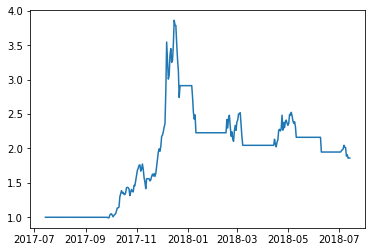

In [9]:
# Strategy1 : golden cross와 dead cross를 활용 - ma5와 ma20 비교
import math

(index, origin) = coin_repository.CoinRepository('BTC').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

golden cross: (2461.216000000001, 2421.3175000000006, 2667.76, datetime.date(2017, 7, 21))
dead cross: (4405.668000000002, 4412.205000000004, 4226.06, datetime.date(2017, 9, 9))
golden cross: (4153.906000000002, 3875.188000000001, 4338.71, datetime.date(2017, 9, 30))
dead cross: (6525.776, 6601.951999999999, 6559.49, datetime.date(2017, 11, 13))
golden cross: (6866.508000000002, 6821.274500000001, 7871.69, datetime.date(2017, 11, 16))
dead cross: (15747.040000000003, 16224.350000000011, 14699.2, datetime.date(2017, 12, 23))
golden cross: (10658.020000000002, 9103.44650000001, 11225.3, datetime.date(2018, 2, 19))
dead cross: (10645.276000000007, 10650.574000000011, 9395.01, datetime.date(2018, 3, 8))
golden cross: (7813.776000000005, 7255.601000000008, 8329.11, datetime.date(2018, 4, 15))
dead cross: (9083.688000000006, 9264.209500000008, 8441.49, datetime.date(2018, 5, 11))
MDD: 40.13683677059642%
CAGR: 279.3533058263559%


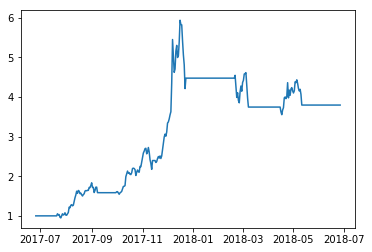

In [6]:
import math

(index, origin) = bitcoin_repository.get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_benefit = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    (ma5_price, ma20_price, close_price, _) = tuple
    if not bought and ma5_price > ma20_price and ma20_price > previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif bought and ma5_price < ma20_price:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (close_price / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (close_price / previous_close))
        else:
            benefits.append(benefits[-1])

            
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))
    
    previous_ma5 = ma5_price
    previous_ma20 = ma20_price
    previous_close = close_price

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

dead cross: (2687.246666666667, 2707.924, 2576.48, datetime.date(2017, 7, 25))
golden cross: (2670.0800000000004, 2668.3160000000003, 2809.01, datetime.date(2017, 7, 28))
dead cross: (2744.5533333333337, 2773.236000000001, 2804.73, datetime.date(2017, 8, 3))
golden cross: (2803.763333333334, 2800.9780000000005, 2895.89, datetime.date(2017, 8, 4))
dead cross: (4228.670000000001, 4248.914000000002, 4193.7, datetime.date(2017, 8, 19))
golden cross: (4195.573333333335, 4135.224000000002, 4334.68, datetime.date(2017, 8, 24))
dead cross: (4466.013333333337, 4598.688000000002, 4236.31, datetime.date(2017, 9, 4))
golden cross: (4524.510000000003, 4478.560000000002, 4599.88, datetime.date(2017, 9, 7))
dead cross: (4351.563333333338, 4405.668000000002, 4226.06, datetime.date(2017, 9, 9))
golden cross: (3615.146666666671, 3576.5960000000027, 3582.88, datetime.date(2017, 9, 17))
dead cross: (3820.6533333333377, 3822.008000000003, 3631.04, datetime.date(2017, 9, 21))
golden cross: (3800.43666666667

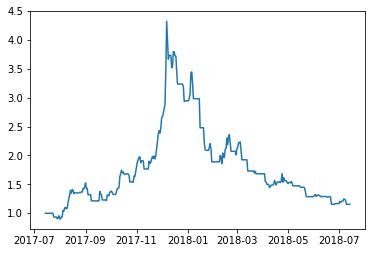

In [10]:
import math

(index, origin) = coin_repository.CoinRepository('BTC').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma3'] = close_series.rolling(window=3).mean()
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=20).mean()
# df = pd.DataFrame(data, new_index)
# df.plot()
previous_ma3 = -1
previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma3'], data['ma5'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma3 <= previous_ma5:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma3 >= previous_ma5:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma3 = tuple[0]
    previous_ma5 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

buy: 2017-07-17
buy: 2017-07-18
buy: 2017-07-20
buy: 2017-07-22
buy: 2017-07-27
buy: 2017-07-28
buy: 2017-07-31
buy: 2017-08-03
buy: 2017-08-04
buy: 2017-08-05
buy: 2017-08-07
buy: 2017-08-08
buy: 2017-08-10
buy: 2017-08-11
buy: 2017-08-12
buy: 2017-08-13
buy: 2017-08-14
buy: 2017-08-22
buy: 2017-08-24
buy: 2017-08-27
buy: 2017-08-29
buy: 2017-08-31
buy: 2017-09-01
buy: 2017-09-06
buy: 2017-09-12
buy: 2017-09-15
buy: 2017-09-18
buy: 2017-09-20
buy: 2017-09-23
buy: 2017-09-25
buy: 2017-09-27
buy: 2017-09-30
buy: 2017-10-02
buy: 2017-10-05
buy: 2017-10-07
buy: 2017-10-08
buy: 2017-10-09
buy: 2017-10-11
buy: 2017-10-12
buy: 2017-10-13
buy: 2017-10-20
buy: 2017-10-25
buy: 2017-10-26
buy: 2017-10-29
buy: 2017-10-31
buy: 2017-11-01
buy: 2017-11-02
buy: 2017-11-03
buy: 2017-11-04
buy: 2017-11-07
buy: 2017-11-08
buy: 2017-11-13
buy: 2017-11-15
buy: 2017-11-16
buy: 2017-11-19
buy: 2017-11-20
buy: 2017-11-24
buy: 2017-11-25
buy: 2017-11-26
buy: 2017-11-27
buy: 2017-11-28
buy: 2017-11-29
buy: 201

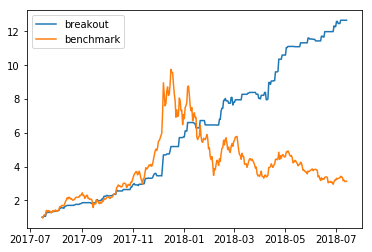

In [11]:
import math
(index, origin) = coin_repository.CoinRepository('BTC').get_data_as_lists()
previous_gap = -1
benefits = []
drawdowns = []
max_benefit = -1

for row in zip(origin['open'], origin['close'], origin['low'], origin['high'], index):
    open_price, close_price, low_price, high_price, date = row
    if previous_gap == -1:
        benefits.append(1)
    else:
        target_price = open_price + previous_gap
        if high_price >= target_price:
            print(f"buy: {date}")
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit * (close_price / target_price))
        else:
            previous_benefit = benefits[-1]
            benefits.append(previous_benefit)
        
    previous_gap = (high_price - low_price) / 2
    if (benefits[-1] > max_benefit):
        max_benefit = benefits[-1]
    
    drawdowns.append(1 - (benefits[-1] / max_benefit))

data_frame = pd.DataFrame({
    'breakout': benefits,
    'benchmark': pd.Series(origin['close'], index) / origin['close'][0]
}, index)
data_frame.plot()

# series2 = pd.Series(drawdowns, index)
# series2.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")

benchmark_drawdowns = []
max_benchmark = -1
for row in data_frame['benchmark']:
    if row > max_benchmark:
        max_benchmark = row
    benchmark_drawdowns.append(1 - (row / max_benchmark)) 

print(f"MDD: {max(benchmark_drawdowns) * 100}%")
print(f"benchmark CAGR: {(data_frame['benchmark'][-1] - 1) * 100}%")


MDD: 69.72191163950066%
CAGR: 0%


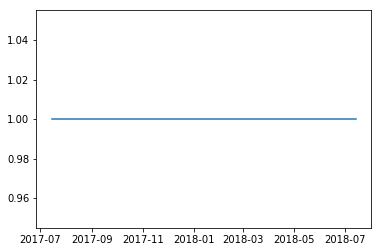

In [13]:
import math

(index, origin) = coin_repository.CoinRepository('BTC').get_data_as_lists()
data = {}
new_index = index
close_series = pd.Series(origin['close'], new_index)
data['ma5'] = close_series.rolling(window=5).mean()
data['ma20'] = close_series.rolling(window=5).mean()
data['close'] = close_series.rolling(window=5).mean()

previous_ma5 = -1
previous_ma20 = -1
previous_close = -1
benefits = []
drawdowns = []
bought = False
max_close = -1

for tuple in zip(data['ma5'], data['ma20'], origin['close'], index):
    if tuple[0] > tuple[1] and previous_ma5 <= previous_ma20:
        print(f"golden cross: {tuple}")
        bought = True
        if len(benefits) == 0:
            benefits.append(1)
        else:
            benefits.append(benefits[-1])
    elif tuple[0] < tuple[1] and previous_ma5 >= previous_ma20:
        print(f"dead cross: {tuple}")
        bought = False
        benefits.append(benefits[-1] * (tuple[2] / previous_close))
    else:
        if len(benefits) == 0:
            benefits.append(1)
        elif bought:
            benefits.append(benefits[-1] * (tuple[2] / previous_close))
        else:
            benefits.append(benefits[-1])
    
    if (tuple[2] > max_close):
        max_close = tuple[2]
    
    drawdowns.append(1 - (tuple[2] / max_close))
    
    previous_ma5 = tuple[0]
    previous_ma20 = tuple[1]
    previous_close = tuple[2]

df = pd.Series(benefits, index)
df.plot()

# df = pd.Series(drawdowns, index)
# df.plot()

print(f"MDD: {max(drawdowns) * 100}%")
print(f"CAGR: {(benefits[-1] - 1) * 100}%")